### Objective
Here we have access to a large amount of granular data relating to the concentration of major air pollutants in India and it will be interesting to see if the claim of reduced air pollution is being actually backed by data. Before going further let's understand about the constituents of Air Pollution

### Types of Air Pollutants
Let's first try and understand the various types of air pollutants in the datasets. On a broader level, these pollutants can be classified as :

**Particulate matter (PM2.5 and PM10)** > Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air. PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5.Source. The following diagram will help to understand the concept more concretely.

**Nitrogen Oxides (NO, NO2, NOx)** > Nitrogen oxides are a group of seven gases and compounds composed of nitrogen and oxygen, sometimes collectively known as NOx gases.The two most common and hazardous oxides of nitrogen are nitric oxide(NO) and nitrogen dioxide(NO2)

**Sulphur Dioxide(SO2)** > Sulfur dioxide, or SO2 is a colorless gas with a strong odor, similar to a just-struck match. It is formed when fuel containing sulfur, such as coal and oil, is burned, creating air pollution.

**Carbon Monoxide(CO)** > Carbon monoxide is a colorless, highly poisonous gas. Under pressure, it becomes a liquid. It is produced by burning gasoline, natural gas, charcoal, wood, and other fuels.

**Benzene, Toluene and Xylene (BTX)** > Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry

**Ammonia( NH3)** > Ammonia pollution is pollution by the chemical ammonia (NH3) – a compound of nitrogen and hydrogen which is a byproduct of agriculture and industry.

**Ozone(O3)** > Ground-level ozone is a colorless and highly irritating gas that forms just above the earth's surface. It is called a "secondary" pollutant because it is produced when two primary pollutants react in sunlight and stagnant air. These two primary pollutants are nitrogen oxides (NOx) and volatile organic compounds (VOCs).

### In this part of the assignment, the analysis has been done in two parts:

1. Analysis of the pollution level in India, over the years - from 2015 to 2020

This will a holistic view of how the pollutant levels have been rising in India and what is the current situation.

2. Effect of Locksown on the Pollution level in India

Here we shall examine the pollution level in India before and after the first stage of Lockdown. 

Analyzing data under these different categories should give us a fair idea of the effect of Lockdown on the Indian pollution level.

In [9]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#!pip install chart_studio
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#py.init_notebook_mode(connected=True)

#Geographical Plotting
import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster

#Racing Bar Chart
#!pip install bar_chart_race
import bar_chart_race as bcr
from IPython.display import HTML

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")# for pretty graphs

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

#### 1. A first look at City level- daily data
We have daily and hourly city data as well as daily and hourly Station data. Station refers to the continuous pollution monitoring stations operated and maintained by the Central Pollution Control Board (CPCB) and the State Pollution Control Boards. Let's begin by analyzing the various cities' daily data to get a big picture. We shall begin by importing the dataset and the necessary libraries for the analysis.

In [39]:
city_day = pd.read_csv('/home/jovyan/Analysis/AQI_Analysis/air-quality-data-in-india/city_day.csv')
cities_db = pd.read_csv('/home/jovyan/Analysis/AQI_Analysis/indian-cities-database/Indian Cities Database.csv')

In [40]:
display("CITY DAILY DATA")
display(city_day.head(3))

'CITY DAILY DATA'

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN


In [12]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


There seems to be a lot of missing values in the dataset. Additionally, the Date column is also not in the Date-Time format.

#### 1.1 Missing Values 
It is always a good idea to see the missing values as a percentage of total values

In [41]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(city_day)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.300000
PM10,11140,37.700000
NH3,10328,35.000000
Toluene,8041,27.200000
Benzene,5623,19.000000
AQI,4681,15.900000
AQI_Bucket,4681,15.900000
PM2.5,4598,15.600000
NOx,4185,14.200000
O3,4022,13.600000


📌 Points to note :

It seems that we have a lot of null values in some columns e.g.Xylene and NH3.There could be a couple of reasons for the missing data:
Station does not have device to capture it.
Issue in the meter reading.
Here is a notebook that I wrote on handling missing data in Python. it includes a section on Missing values in Time Series problems too . Handling missing values in Python

#### 1.2 Cities in the dataset

In [42]:
cities = city_day['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Bengaluru', 'Delhi', 'Lucknow', 'Chennai', 'Mumbai', 'Ahmedabad',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')


#### 1.3 Convert to Date Time format
Let's convert the Date column into Date Time format with the help of datetime library.

In [70]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)

#### 1.4 Data Availability

In [16]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


#### 2. Analysing the complete City Level Daily Data¶
Let's now analyse the work with the data to see what patterns and insights we can uncover from it.
#### 2.1 Combining the Benzene, Toluene and Xylene levels into one column - BTX

In [71]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);

#### 2.2 Combining the PM2.5 and PM10 into one column - Particulate Matter

In [72]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

#### 2.3 Subsetting columns
Even though a lot of columns have been provided in the dataset, we shall select a few prominent ones. Let's create a new dataframe called pollutants containg the major pollutants responsible for air pollution.

In [73]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

#### 2.3 Visualising yearly data ¶
I'll plot the data as dots instead of lines since with so many data points, the line plot will become crowded and will be hard to read.

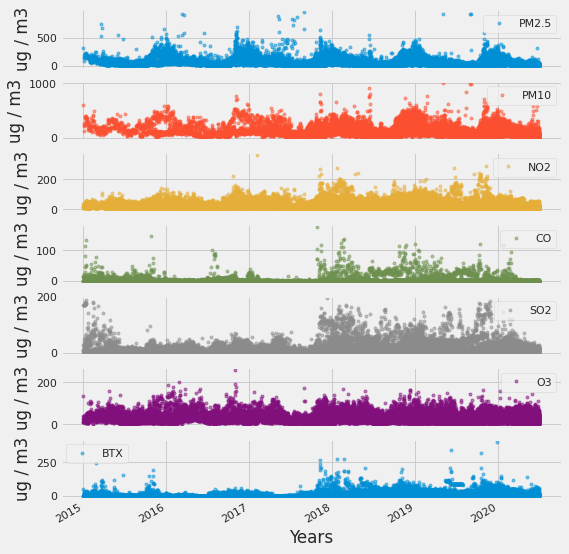

In [74]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(8, 10), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')
plt.savefig('/home/jovyan/Analysis/AQI_Analysis/pollutants.png', dpi=500, bbox_inches="tight", pad_inches=0.05)

📌 Points to note :

PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.

SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.

This is just an overview. We will have to look deeper to get specific answers.

In [75]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=16); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=16)


#### 2.4 Year and Month wise distribution 
Next, let’s further explore the seasonality of our data with box plots. We shall use boxplots to group the data by different time periods and display the distributions for each group. We’ll group the data by year and month. All measurements are in ug / m3.

#### 2.4.1 NO2 

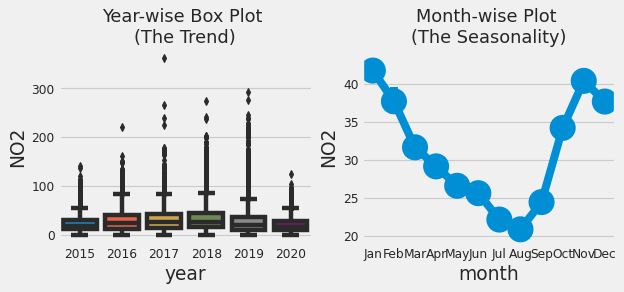

In [76]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)

#### 2.4.2 SO2 

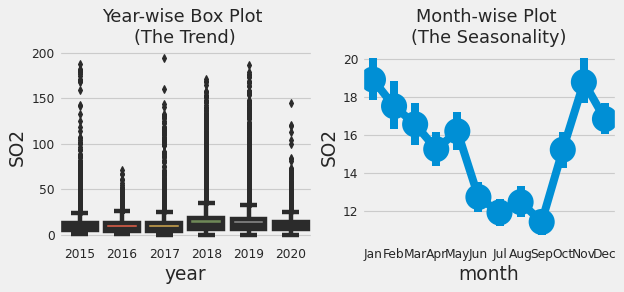

In [77]:
#city_day.reset_index(inplace=True)
df = city_day.copy()
value='SO2'
trend_plot(df,value)

#### 2.4.3 BTX 

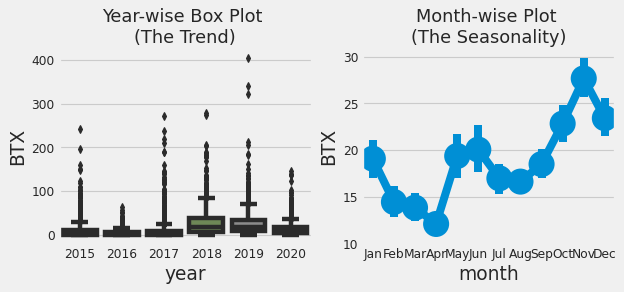

In [78]:
value='BTX'
trend_plot(df,value)

#### 2.4.4 PM2.5 

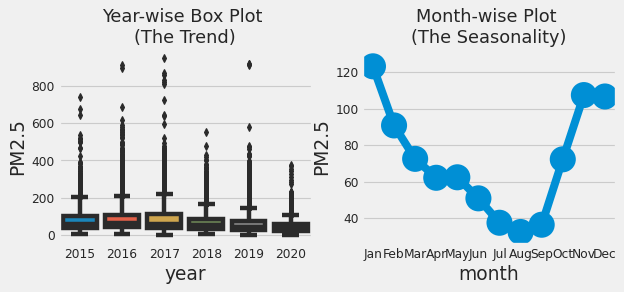

In [79]:
value='PM2.5'
trend_plot(df,value)

#### 2.4.5 PM10 

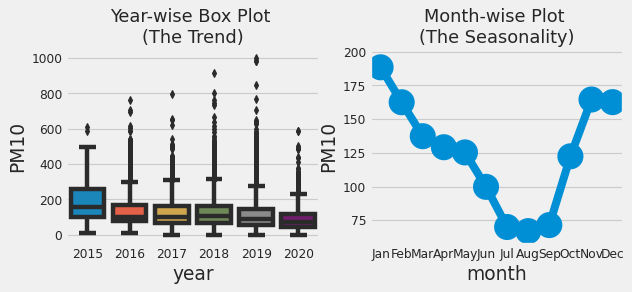

In [80]:
value='PM10'
trend_plot(df,value)

There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon season sets in during these months.The BTX levels additionally show a major decline around April.

The pollution level then start rising and reach highest levels in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.

SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.

The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately.

#### 3. Most Polluted Indian Cities 
Let's now look at the Indian cities which contribute to maximum pollution. We shall output the top 10 cities in each pollutant category by mean concentration of the pollutant over the years

In [81]:
def max_polluted_city(pollutant):
    x1 = city_day[[pollutant,'City']].groupby(["City"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [82]:
#source: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [83]:
pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
btx = max_polluted_city('BTX')


display_side_by_side(pm2_5,pm10,no2,so2,co,btx)

,City,PM2.5
0,Patna,123.500000
1,Delhi,117.200000
2,Gurugram,117.100000
3,Lucknow,109.710000
4,Ahmedabad,67.850000
5,Kolkata,64.360000
6,Jorapokhar,64.230000
7,Brajrajnagar,64.060000
8,Guwahati,63.690000
9,Talcher,61.410000


📌 Points to note :

Patna, Delhi , Ahmedabad and Kolkata seem to top the charts. Ahmedabad has maximum concenterations of NO2,SO2 as well as CO levels.
Let's make a quick inspection of the levels pre and post COVID

#### 4. Effect of Lockdown on AQI
Let's now see how has the Lockdown affected the AQI levels in the prominent cities of India.For this we shall consider the data from 2019 onwards only. But before that let's understand what AQI is:

#### 4.1 AQI : Air Quality Index
An air quality index (AQI) is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become.There are six AQI categories, namely Good, Satisfactory, Moderately polluted, Poor, Very Poor, and Severe. The proposed AQI will consider eight pollutants (PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb) for which short-term (up to 24-hourly averaging period) National Ambient Air Quality Standards are prescribed. Based on the measured ambient concentrations, corresponding standards and likely health impact, a sub-index is calculated for each of these pollutants. The worst sub-index reflects overall AQI. Likely health impacts for different AQI categories and pollutants have also been suggested, with primary inputs from the medical experts in the group. The AQI values and corresponding ambient concentrations (health breakpoints) as well as associated likely health impacts for the identified eight pollutants are as follows: [https://en.wikipedia.org/wiki/Air_quality_index]

In [101]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2020-04-01'] #POST COVID
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1917,2020-04-01,Ahmedabad,153.0,Moderate
1918,2020-04-02,Ahmedabad,164.0,Moderate
1919,2020-04-03,Ahmedabad,173.0,Moderate
1920,2020-04-04,Ahmedabad,182.0,Moderate
1921,2020-04-05,Ahmedabad,152.0,Moderate


In [102]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2020-01-01'] #PRE-COVID
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()

,Date,City,AQI,AQI_Bucket
1826,2020-01-01,Ahmedabad,216.0,Poor
1827,2020-01-02,Ahmedabad,162.0,Moderate
1828,2020-01-03,Ahmedabad,220.0,Poor
1829,2020-01-04,Ahmedabad,254.0,Poor
1830,2020-01-05,Ahmedabad,255.0,Poor


#### 4.2 AQI before and after Lockdown 
It'll be also interesting to see tha difference in AQI before and after the Lockdown.

In [105]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Ahmedabad    383.776471
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64
City
Ahmedabad    127.810811
Bengaluru     68.486486
Chennai       62.351351
Delhi        107.270270
Hyderabad     65.567568
Mumbai        73.891892
dtype: float64


In [106]:
# Helper functions

#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n): 
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang): 
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

In [108]:
#source: http://nicolasfauchereau.github.io/climatecode/posts/drawing-a-gauge-with-matplotlib/
from matplotlib.patches import Circle, Wedge, Rectangle
def gauge(labels=['GOOD','SATISFACTORY','MODERATE','POOR','VERY POOR','EXTREME'], \
          colors='jet_r', arrow=1, title='', fname=False): 
    
    """
    some sanity checks first
    

"""
    
    N = len(labels)
    
    if arrow > N: 
        raise Exception("\n\nThe category ({}) is greated than \
        the length\nof the labels ({})".format(arrow, N))
 
    
    """
    if colors is a string, we assume it's a matplotlib colormap
    and we discretize in N discrete colors 
    """
    
    if isinstance(colors, str):
        cmap = cm.get_cmap(colors, N)
        cmap = cmap(np.arange(N))
        colors = cmap[::-1,:].tolist()
    if isinstance(colors, list): 
        if len(colors) == N:
            colors = colors[::-1]
        else: 
            raise Exception("\n\nnumber of colors {} not equal \
            to number of categories{}\n".format(len(colors), N))

    """
    begins the plotting
    """
    
    fig, ax = plt.subplots()
    ang_range, mid_points = degree_range(N)

    labels = labels[::-1]
    
    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors): 
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))
    
    [ax.add_patch(p) for p in patches]
    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels): 

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)
    
    ax.text(0, -0.05, title, horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')
    """
    plots the arrow now
    """
    
    pos = mid_points[abs(arrow - N)]
    
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')
    
    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """
    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

"Ahmedabad's AQI levels"

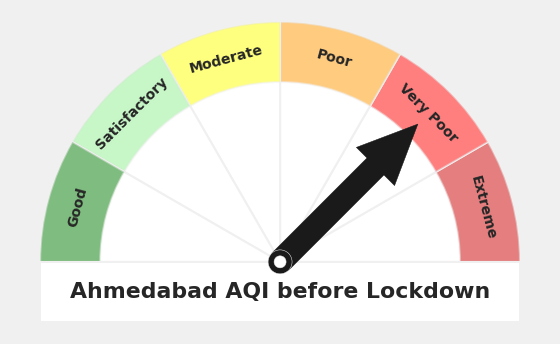

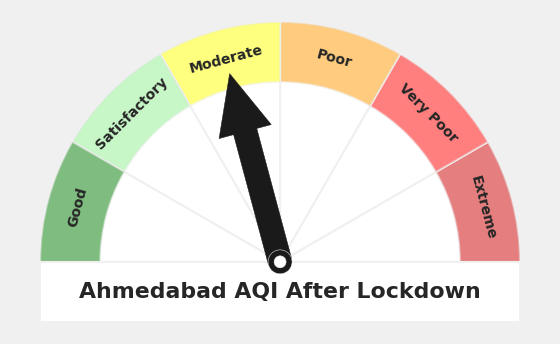

In [109]:
display("Ahmedabad's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=5, title='Ahmedabad AQI before Lockdown') 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title='Ahmedabad AQI After Lockdown') 

"Delhi's AQI levels"

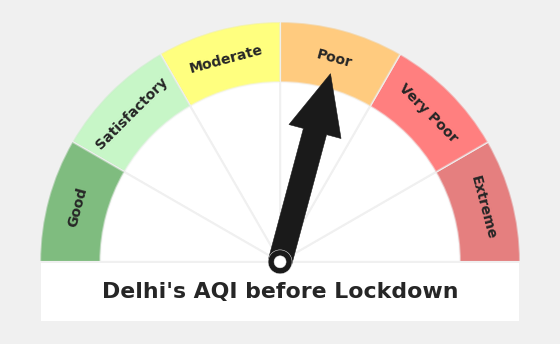

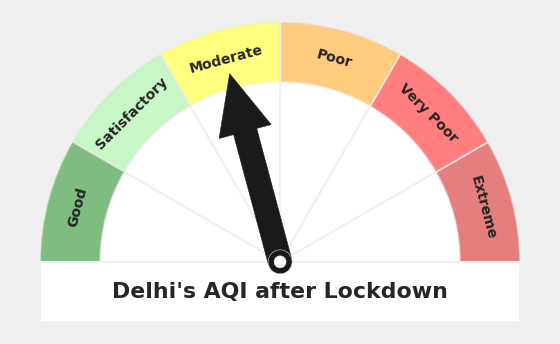

In [110]:
display("Delhi's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=4, title="Delhi's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Delhi's AQI after Lockdown") 

"Mumbai's AQI levels"

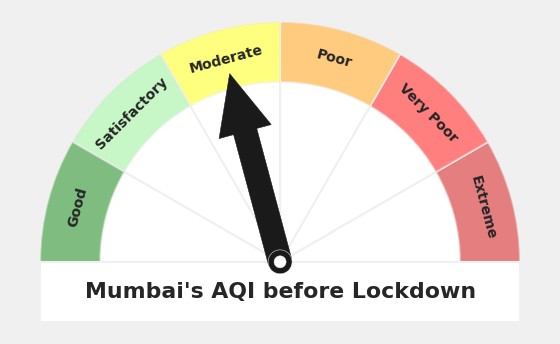

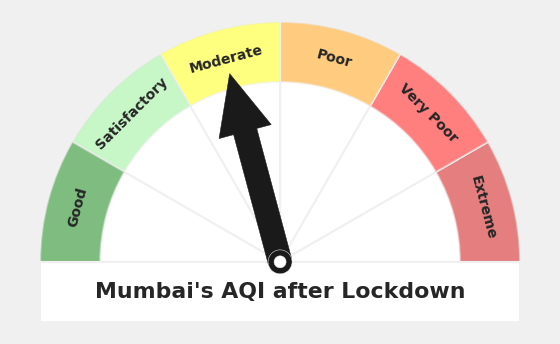

In [111]:
display("Mumbai's AQI levels")

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI before Lockdown") 

gauge(labels=['Good','Satisfactory','Moderate','Poor','Very Poor','Extreme'], \
      colors=['#007A00','#90EE90','#ffff00','#FF9900','#ff0000','#CC0000'], arrow=3, title="Mumbai's AQI after Lockdown") 

#### 5. Geographical Analysis using Dual Maps 
A dual map let's you compare the values side by side.By clicking on the icons, you can see the value of AQI on the popups</a>

In [122]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
filtered_city_day = city_day[city_day['Date'] <= '2020-03-01']
AQI_pre= filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
filtered_city_day = city_day[city_day['Date'] >= '2020-03-01']
AQI_post= filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]

In [123]:
df11 = AQI_pre[['City','AQI']]
df22 = AQI_post[['City','AQI']]

df_pre_coord = df11.groupby('City')['AQI'].mean().to_frame().reset_index() #let's call it this
df_post_coord = df22.groupby('City')['AQI'].mean().to_frame().reset_index()

df_pre_AQI = pd.merge(df_pre_coord,cities_db,on='City')
df_pre_AQI['AQI'] = df_pre_AQI['AQI'].round(0)
df_post_AQI = pd.merge(df_post_coord,cities_db,on='City')
df_post_AQI['AQI'] = df_post_AQI['AQI'].round(0)

In [136]:
m = plugins.DualMap(location=(22.9734, 78.6569), tiles=None, zoom_start=3.9) #choose location to use

folium.TileLayer('Stamen Toner').add_to(m) #selecting the tilelayers i used
folium.TileLayer('openstreetmap').add_to(m)


fg_1 = folium.FeatureGroup(name='Pre-lockdown').add_to(m.m1) #labelling
fg_2 = folium.FeatureGroup(name='Post-lockdown').add_to(m.m2)


#for pre-lockdown
for lat, lon, value, name in zip(df_pre_AQI['Lat'], df_pre_AQI['Long'], df_pre_AQI['AQI'], df_pre_AQI['City']):
    folium.CircleMarker([lat, lon], 
                        radius=10,
                        icon=folium.Icon(color='red'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.6 ).add_to(fg_1)




#for post-lockdown
for lat, lon, value, name in zip(df_post_AQI['Lat'], df_post_AQI['Long'], df_post_AQI['AQI'], df_post_AQI['City']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        icon=folium.Icon(color='orange'),
                        popup = ('<strong>City</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>AQI(Average)</strong>: ' + str(value) + '<br>'),
                        fill_color='orange',
                        fill_opacity=0.6 ).add_to(fg_2)
folium.LayerControl(collapsed=False).add_to(m)

m